In [1]:
import mlc_func as mlcf
import numpy as np
import pandas as pd
import keras
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
def create_target_file(baseline, reference, output, offset = 0):
    targets = np.genfromtxt(reference, delimiter = ',') -\
        np.genfromtxt(baseline, delimiter = ',') - offset
#     species = np.array(['o','h','h']*int(len(targets)/3)).reshape(-1,1)
#     targets = np.concatenate([targets,species], axis = 1)
    pd.DataFrame(targets).to_csv(output, index = None, header = None)

In [24]:
# basepath_feat = '../data/PBE/szp/basis_long_elf.json_processed/'
# basepath_tar = '../data/PBE/szp/'
# revpath_tar = '../data/MB-pol'

basepath_feat = '../data/PBE/sz/basis_long_elf.json_processed/'
basepath_tar = '../data/PBE/sz/'
revpath_tar = '../data/MB-pol'

# systems = ['monomers','dimers','trimers']
systems = ['16p16']
mono_offset = 0
n_mol = [3,2,1]
filters = [([True,True] + [False]*10)*3000]
for s,nm in zip(systems, n_mol):
    create_target_file(basepath_tar +'/{}.forces'.format(s),
                      revpath_tar + '/{}.forces'.format(s),
                      basepath_tar +'/{}_targets.forces'.format(s), mono_offset*nm)
        
feature_src = [basepath_feat + s +'_processed.hdf5' for s in systems]
target_src = [basepath_tar +'/' + s +'_targets.forces' for s in systems]
traj_src = [basepath_tar +'/' + s +'.traj' for s in systems]
# # filters = [np.genfromtxt('../publication/data/filters/{}.filter'.format(s), dtype =bool) for s in systems]
nn = mlcf.ml.build_force_mlcf(feature_src, target_src,traj_src, filters =[], automask_std = 1e-3,
                                  autofilt_percent = 0.00, species = 'o')


{'r_o_o': 1.5, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 2.0, 'n_rad_o': 3, 'n_rad_h': 3, 'n_l_o': 4, 'n_l_h': 3, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'elf'}
(8192, 48)


In [25]:
# nn.model = keras.models.load_model('../../elf_models/mlcf_master/16p16/pbesz_mbp_long/force_o')

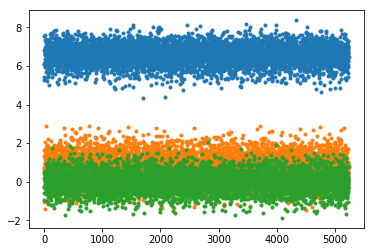

In [26]:
plot(nn.y_train,ls = '', marker = '.')

In [13]:
nn.nodes_per_layer = 16

In [14]:
nn.train(early_stopping=True, b=1e-8, restart = True)

--------Epoch = 0----------
Training loss || Validation loss
     4.205597 ||      4.191906
--------Epoch = 500----------
Training loss || Validation loss
     0.192606 ||      0.199343
--------Epoch = 1000----------
Training loss || Validation loss
     0.159648 ||      0.166874
--------Epoch = 1500----------
Training loss || Validation loss
     0.151362 ||      0.158837
--------Epoch = 2000----------
Training loss || Validation loss
     0.145770 ||      0.152989
--------Epoch = 2500----------
Training loss || Validation loss
     0.139279 ||      0.146683
--------Epoch = 3000----------
Training loss || Validation loss
     0.134475 ||      0.141928
--------Epoch = 3500----------
Training loss || Validation loss
     0.131506 ||      0.138857
--------Epoch = 4000----------
Training loss || Validation loss
     0.129754 ||      0.136988
--------Epoch = 4500----------
Training loss || Validation loss
     0.127883 ||      0.135332


======== Evaluation on test set =============
              RMSE =  0.1385
              MAE = 0.1088
              Max. abs. error = 0.6463


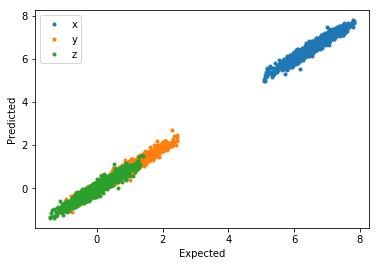

{'rmse': 0.1385448635007406,
 'mae': 0.1087899777978924,
 'max': 0.6462587295357061}

In [15]:
nn.evaluate(plot=True, on='test')

======== Evaluation on test set =============
              RMSE =  0.1008
              MAE = 0.0789
              Max. abs. error = 0.5652


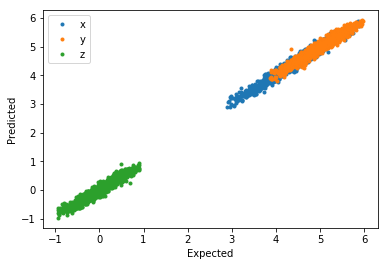

{'rmse': 0.1007903440137988,
 'mae': 0.07889109244667232,
 'max': 0.5651834761911285}

In [20]:
nn.evaluate(plot=True, on='test')

In [16]:
nn.save_all('../../elf_models/mlcf_master/16p16/pbesz_mbp_elf_long/')